In [1]:
#import required packages
import pandas as pd
from math import sqrt, pow

In [2]:
# read the excel dataset
df = pd.read_excel('body.xlsx')
df.head(3)

,biacromial_diameter,biiliac_diameter,bitrochanteric_diameter,chest_depth,chest_diameter,elbow_diameter,wrist_diameter,knee_diameter,ankle_diameter,shoulder_girth,chest_girth,waist_girth,navel_girth,hip_girth,thigh_girth,bicep_girth,forearm_girth,knee_girth,calf_maximum_girth,ankle_minimum_girth,wrist_minimum_girth,age,weight,height,gender
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,89.5,71.5,74.5,93.5,51.5,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,97.0,79.0,86.5,94.8,51.5,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,97.5,83.2,82.9,95.0,57.3,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1


## Body Mass Index (BMI)

BMI is given by the formula
BMI = weight/(height)^2

here, weight is in kgs and height is in meters.

In [3]:
# height is given in cms so we will first convert height into meters.
df['height_meters'] = df.apply(lambda x: x['height']/100, axis = 1) 

In [4]:
#calculate bmi
df['bmi'] = df.apply(lambda x: (x['weight']/(x['height_meters'])*(x['height_meters'])), axis=1 )

## CPA

CPA = -110 + 1.34(chest_diameter) + 1.54(chest_depth) +1.20(bitrochanteric_diameter) + 1.11(wrist_girth) + 1.15(ankle_girth) + 0.177(height) 

In [5]:
df['cpa'] = df.apply(lambda x: (-110 + 1.34*x['chest_diameter']+ 1.54*x['chest_depth'] +1.20*x['bitrochanteric_diameter'] + 1.11*x['wrist_minimum_girth'] + 1.15*x['ankle_minimum_girth'] + 0.177*x['height']), axis=1)

#Regression and Correlation

In [6]:
# retrieving the required dataset.
df_1 = pd.DataFrame(data = df, columns=['age','bmi'])
df_2 = pd.DataFrame(data = df, columns=['weight', 'cpa'])

## Least squares and correlation

To calculate the least squares line, we need to calculate the following values from the data:



*   **sumx** and **sumy** : the sum of all X values and sum of all Y values.
*   **sumxy** : the sum of all the products of each corresponding X,Y pair.
*   **sumx_squared** and **sumy_squared** : the sum of square of every X value and the sum of square of every Y value 
*   **N** : the number of pairs


*slope = (N * sumxy - (sumx * sumy)) / (N * sumx_squared - (sumx)^2)*

*intercept = (sumy - (slope * sumx)) / N*

*correlation = (N * sumxy - (sumx * sumy)) / sqrt ((sumx_squared - (sumx)^2) * (sumy_squared - (sumy)^2))*

In [7]:
#defining the function to calculate slope, intercept, and correlation
def reg_and_corr(df, x, y):

  #calculate sumx and sumy
  sumx = df[x].sum()
  sumy = df[y].sum()

  #calculate sumxy
  df[x+ '*' +y] = df.apply(lambda z: z[x] * z[y], axis=1)
  sumxy = df[x+ '*' +y].sum()  

  #calculate x^2 and y^2 for each cell
  df[x + '*' + x] = df.apply(lambda z: z[x] * z[x], axis=1)
  df[y + '*' + y] = df.apply(lambda z: z[y] * z[y], axis=1)

  #taking summation of the x^2 and y^2 (calculate above) to calculate sumx_squared and sumy_squared 
  sumx_squared = df[x + '*' + x].sum()
  sumy_squared = df[y + '*' + y].sum()

  #counting the number of rows in dataframe
  N = df.shape[0]

  #calculate slope
  slope = ((N * sumxy) - (sumx * sumy)) / ((N * sumx_squared) - pow(sumx,2)) 

  #calculate intercept
  intercept = (sumy - (slope * sumx)) / N

  #calculate correlation
  correlation = (N * sumxy - (sumx * sumy)) / sqrt ((sumx_squared - pow(sumx, 2)) * (sumy_squared - pow(sumy,2)))

  return slope, intercept, correlation


## Regression between Age and BMI

Age values will be x and BMI values will be y.

In [8]:
s_1, i_1, corr_1 =  reg_and_corr(df_1, 'age', 'bmi')
print(s_1, i_1, corr_1)

0.28788266751559466 60.45881542736957 0.012736984679324862


## Regression between Weight and CPA

Weight values will be x and CPA values will be y.

In [9]:
s_2, i_2, corr_2 = reg_and_corr(df_2, 'weight', 'cpa')
print(s_2, i_2, corr_2)

0.88847222052283 7.67545737150834 0.03311586846566294


#Plots

In [12]:
# import required packages
import matplotlib.pyplot as plt
import numpy as np

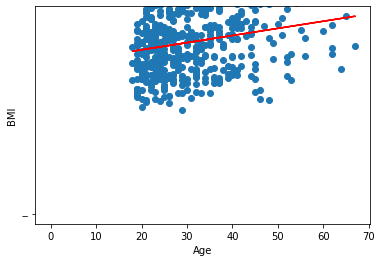

In [17]:
plt.scatter(df_1['age'], df_1['bmi'])
x = np.array(df_1['age'])
y = s_1 * x + i_1
plt.plot(x,y, '-r','--')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

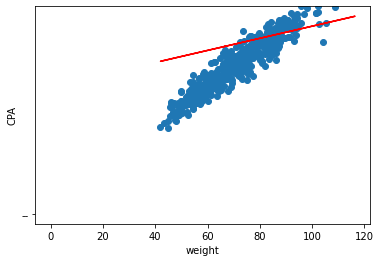

In [19]:
plt.scatter(df_2['weight'], df_2['cpa'])
x = np.array(df_2['weight'])
y = s_1 * x + i_1
plt.plot(x,y, '-r','--')
plt.xlabel('weight')
plt.ylabel('CPA')
plt.show()